In [4]:
import xgboost as xgb
import pandas as pd
import csv
%pwd
path = '/home/ubuntu/jupyter/Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv'
test_path = '/home/ubuntu/jupyter/Microsoft-Malware-Challenge/Dataset/test/LargeTest.csv'
import csv
# with open(path, 'rb') as csvfile:
#     spamreader = csv.reader(csvfile)
#     for row in spamreader:
#         print ', '.join(row)
#         break
from numpy import genfromtxt
ori_train_data = genfromtxt(path, delimiter=',')
ori_test_data = genfromtxt(test_path, delimiter=',')



In [6]:
label_index = 692
my_data = ori_train_data
test_data = ori_test_data


import numpy as np
data =  np.ndarray(shape=(len(my_data),1804), dtype=float, order='C')

f_train = []
f_test = []
    
f_index = 692


for i in range(len(my_data)):
    if i == 0:
        continue
    data[i] = np.delete(my_data[i], len(my_data[i])-1)
    f_train.append(data[i][label_index])

for i in range(len(test_data)):
    f_test.append(test_data[i][label_index])

f_train.sort()
f_test.sort()

In [7]:
label = np.zeros(len(data))


for i in range(len(data)):
    if data[i][f_index] > f_train[len(f_train)/2]:
        label[i] = 1 
    
for i in range(len(test_data)):
    if test_data[i][f_index] > f_test[len(f_test)/2]:
        label

dtrain = xgb.DMatrix(data, label=label)
dtest = xgb.DMatrix(test_data,label=label)

In [20]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold

seed = 5
n_fold_inner = 5
skf_inner = StratifiedKFold(n_splits=n_fold_inner,random_state=seed, shuffle=True)

fixed_parameters = {
               'max_depth':36,
               'min_child_weight':5,
               'learning_rate':0.4,
               'colsample_bytree':0.6,
               'subsample':0.9,
               'gamma':0,
               'max_delta_step':0,
               'colsample_bylevel':1,
               'reg_alpha':0,
               'reg_lambda':1,
               'scale_pos_weight':1,
               'base_score':0.6,
               'random_state':5,
               'objective':'binary:logistic',
               'silent': 1}

params_grid = {
               'n_estimators':np.linspace(1, 20, 20).astype('int')
               }

bst_grid = GridSearchCV(
            estimator=XGBClassifier(**fixed_parameters),param_grid=params_grid,n_jobs=8,
            cv=skf_inner,scoring='roc_auc',iid=False,refit=False,verbose=1)

bst_grid.fit(data,label)

best_params_grid_search = bst_grid.best_params_
best_score_grid_search = bst_grid.best_score_


means_train = bst_grid.cv_results_['mean_train_score']
stds_train = bst_grid.cv_results_['std_train_score']
means_test = bst_grid.cv_results_['mean_test_score']
stds_test = bst_grid.cv_results_['std_test_score']

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', Deprec

/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', Deprec

/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', Deprec

/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', Deprec

/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', Deprec

/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:161: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/xgboost-0.6-py2.7.egg/xgboost/sklearn.py:171: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', Deprec

In [24]:
print('\ntest-auc-mean  test-auc-std  train-auc-mean  train-auc-std')
for idx in range(0, len(means_test)):
    print means_test[idx], stds_test[idx], means_train[idx], stds_train[idx]


test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0.93202598303 0.0233035780914 0.957999202455 0.0122524171687
0.999717009854 0.000174095234567 0.999933652162 3.17674794454e-05
0.999726157798 0.000159014441202 0.99994481749 3.10506309965e-05
0.999564460498 0.000227115055351 0.999911479755 5.09602056886e-05
0.999451011586 0.000286389916385 0.999893873519 5.81818373639e-05
0.999925671402 4.81954936333e-05 0.999996005993 3.7565574662e-06
0.999988263906 1.19514535021e-05 1.0 7.02166693715e-17
0.999979135832 1.81627643421e-05 0.999999755469 3.26041417065e-07
1.0 0.0 1.0 4.96506830649e-17
1.0 0.0 1.0 4.96506830649e-17
1.0 0.0 1.0 4.96506830649e-17
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 0.0
1.0 0.0 1.0 4.96506830649e-17
1.0 0.0 1.0 4.96506830649e-17
1.0 4.96506830649e-17 1.0 1.31363359814e-16
1.0 4.96506830649e-17 1.0 4.96506830649e-17
1.0 0.0 1.0 4.96506830649e-17


/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


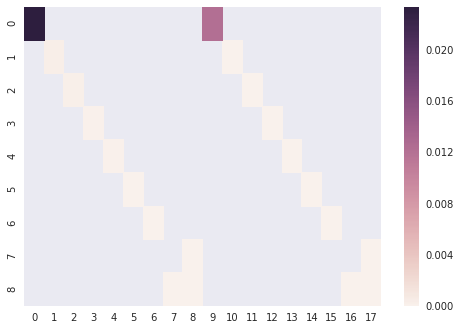

/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


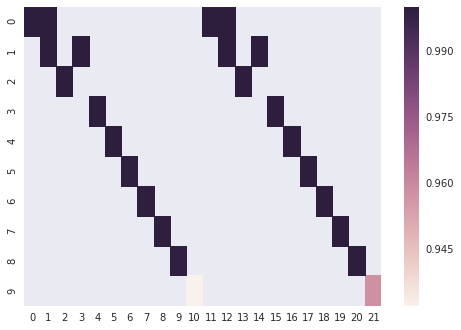

In [25]:
rows = []
for idx in range(0, len(means_test)):
    rows.append((means_test[idx], stds_test[idx], means_train[idx], stds_train[idx]))

df = pd.DataFrame(rows)
df.columns = ('test-auc-mean', 'test-auc-std', 'train-auc-mean', 'train-auc-std')

import seaborn
from seaborn import plt
source_perf = pd.pivot_table(df[['test-auc-mean', 'test-auc-std', 'train-auc-mean', 'train-auc-std']], columns=['train-auc-mean'], index=['test-auc-mean'])
seaborn.heatmap(np.array(source_perf))
plt.show()

target_perf = pd.pivot_table(df[['test-auc-mean', 'test-auc-std', 'train-auc-mean', 'train-auc-std']], columns=['train-auc-std'], index=['test-auc-std'])
seaborn.heatmap(np.array(target_perf))
plt.show()